<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/RAG/kfoodchef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas tqdm langchain langchain-community langchain-openai langchain-core langchain-openai chromadb faiss-cpu streamlit streamlit-extras streamlit-option-menu "huggingface_hub[hf_xet]"
!pip install -U transformers sentence-transformers torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving chroma_db.zip to chroma_db.zip


In [ ]:
# /content/chroma_db로 압축 해제
import os
import zipfile

ZIP_PATH = "/content/chroma_db.zip"
TARGET_DIR = "/content"

# 압축 해제
with zipfile.ZipFile(ZIP_PATH, "r") as zip_ref:
    zip_ref.extractall(TARGET_DIR)

# 확인
!ls /content
!ls /content/chroma_db

chroma_db  chroma_db.zip  sample_data
4113bb63-e11f-4bfc-b4f4-1a8c98a04e49  chroma.sqlite3


In [ ]:
# Chroma DB 정상 로드 테스트
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma

EMBED_MODEL = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
PERSIST_DIR = "/content/chroma_db"

embedding = HuggingFaceEmbeddings(model_name=EMBED_MODEL)

vectorstore = Chroma(
    persist_directory=PERSIST_DIR,
    embedding_function=embedding
)

print("Loaded vectors:", vectorstore._collection.count())

/tmp/ipython-input-3205413849.py:8: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name=EMBED_MODEL)
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/tmp/ipython-input-3205413849.py:10: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain-chroma package and should be used instead. To use it run `pip install -U `langchain-chroma` and import as `from `langchain_chroma import Chroma``.
  vectorstore = Chroma(


Loaded vectors: 184991


In [ ]:
from google.colab import files
files.upload()

Saving rag_llm.py to rag_llm.py
Saving retriever.py to retriever.py


{'rag_llm.py': b'from dotenv import load_dotenv\r\nfrom langchain_openai import ChatOpenAI\r\n\r\nload_dotenv()\r\n\r\nllm = ChatOpenAI(\r\n    model="gpt-4o-mini",\r\n    temperature=0.6\r\n)\r\n\r\ndef llm_chat(prompt: str) -> str:\r\n    return llm.invoke(prompt).content\r\n\r\ndef llm_chat_stream(prompt: str):\r\n    for chunk in llm.stream(prompt):\r\n        if chunk.content:\r\n            yield chunk.content\r\n',
 'retriever.py': b'# retriever.py\r\nfrom langchain_community.vectorstores import Chroma\r\nfrom langchain_community.embeddings import HuggingFaceEmbeddings\r\n\r\nPERSIST_DIR = "./chroma_db"\r\nEMBED_MODEL = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"\r\n\r\nembedding = HuggingFaceEmbeddings(model_name=EMBED_MODEL)\r\n\r\nvectorstore = Chroma(\r\n    persist_directory=PERSIST_DIR,\r\n    embedding_function=embedding\r\n)\r\n\r\n# \xe2\x9c\x85 \xed\x9b\x84\xeb\xb3\xb4\xea\xb5\xb0 \xeb\x84\x89\xeb\x84\x89\xed\x9e\x88 \xeb\xbd\x91\xea\xb3\xa0(\xec\x98\

In [ ]:
# retriever.py
# ✅ 후보군 넉넉히 뽑고(예: 30), 아래에서 필터/정렬할 거임
retriever = vectorstore.as_retriever(search_kwargs={"k": 30})

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "sk-p"

In [ ]:
# rag_llm.py
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.6
)

def llm_chat(prompt: str) -> str:
    return llm.invoke(prompt).content

def llm_chat_stream(prompt: str):
    for chunk in llm.stream(prompt):
        if chunk.content:
            yield chunk.content

In [ ]:
from google.colab import files
files.upload()

Saving rag_pipeline.py to rag_pipeline.py


{'rag_pipeline.py': b'# rag_pipeline.py\r\nfrom typing import List, Dict, Tuple\r\nimport re\r\n\r\nfrom rag_llm import llm_chat, llm_chat_stream\r\nfrom retriever import retriever\r\n\r\n# ---------------------------\r\n# Language / Persona Level\r\n# ---------------------------\r\nLANGUAGE_LEVELS = {\r\n    "BEGINNER": "Beginner Korean learner",\r\n    "INTERMEDIATE": "Intermediate Korean learner",\r\n    "NATIVE": "Native Korean speaker"\r\n}\r\n\r\n# ---------------------------\r\n# Language detect\r\n# ---------------------------\r\ndef detect_language(text: str) -> str:\r\n    if re.search(r"[\xea\xb0\x80-\xed\x9e\xa3]", text):\r\n        return "Korean"\r\n    return "English"\r\n\r\n# ---------------------------\r\n# Persona (LLM \xeb\xa7\x90\xed\x88\xac/\xea\xb7\x9c\xec\xb9\x99)\r\n# ---------------------------\r\nPERSONA_FOREIGN_BEGINNER = """\r\nYou are \'K-recipe\', a Korean food guide chatbot for foreigners living in Korea.\r\n\r\nPersona:\r\n- User is a foreigner living i

In [ ]:
# rag_pipeline.py
from typing import List, Dict, Tuple
import re

from rag_llm import llm_chat, llm_chat_stream
from retriever import retriever

# ---------------------------
# Language / Persona Level
# ---------------------------
LANGUAGE_LEVELS = {
    "BEGINNER": "Beginner Korean learner",
    "INTERMEDIATE": "Intermediate Korean learner",
    "NATIVE": "Native Korean speaker"
}

# ---------------------------
# Language detect
# ---------------------------
def detect_language(text: str) -> str:
    if re.search(r"[가-힣]", text):
        return "Korean"
    return "English"

# ---------------------------
# Persona (LLM 말투/규칙)
# ---------------------------
PERSONA_FOREIGN_BEGINNER = """
You are 'K-recipe', a Korean food guide chatbot for foreigners living in Korea.

Persona:
- User is a foreigner living in Korea
- Beginner at cooking
- Not familiar with Korean ingredients or cooking terms
- Wants simple, short, practical explanations
- Friendly tone, not formal
- Avoid long explanations

Behavior rules:
- Be empathetic first
- Use bullet points
- Max 5 cooking steps
- If Korean terms are used, explain briefly
"""

# ---------------------------
# Beginner Glossary (난이도 제어)
# ---------------------------
BEGINNER_GLOSSARY = {
    # -------- 재료 --------
    "어패류": "생선이나 조개 같은 해산물",
    "돈육": "돼지고기",
    "우육": "소고기",
    "가금류": "닭이나 오리 고기",
    "육류": "고기",
    "해산물": "바다에서 나는 음식",
    # -------- 맛 / 식감 --------
    "겉바속촉": "겉은 바삭하고 안은 부드러운",
    "단짠단짠": "달고 짠 맛이 함께 나는 맛",
    "감칠맛": "계속 먹고 싶은 깊은 맛",
    "불향": "불에 구운 냄새",
    "칼칼하다": "약간 맵고 시원한 느낌",
    "담백하다": "기름지지 않고 깔끔한 맛",
    "비린내": "생선에서 나는 좋지 않은 냄새",
    # -------- 조리법 --------
    "숙성": "고기를 잠시 두어 맛을 좋게 하는 것",
    "염지": "소금으로 간을 미리 하는 것",
    "발효": "시간이 지나며 자연스럽게 맛이 변하는 것",
    "저온조리": "낮은 온도에서 천천히 익히는 방법",
    "블랜칭": "끓는 물에 잠깐 데치는 것",
    "시어링": "겉면만 빠르게 굽는 것",
    "마리네이드": "양념에 재워 두는 것",
    "볶음": "팬에 기름을 조금 넣고 빠르게 익히는 요리",
    # -------- 스타일 / 상황 --------
    "손님접대용": "손님에게 대접하기 좋은",
    "집들이용": "집에 손님이 왔을 때 먹기 좋은",
    "근사한": "보기에도 좋고 맛있어 보이는",
    "고급스러운": "조금 특별해 보이는",
    "비주얼": "겉모습",
    "플레이팅": "음식을 예쁘게 담는 것",
    "한상차림": "여러 음식을 한 번에 차린 상",
    # -------- 난이도 --------
    "초급자도 가능": "요리 처음 하는 사람도 할 수 있는",
    "중급자용": "조금 요리해 본 사람이 하면 좋은",
    "고난이도": "요리에 익숙해야 하는",
    # -------- 기타 --------
    "조화롭다": "잘 어울린다",
    "풍미": "음식의 전체적인 맛과 향",
    "식감": "씹을 때 느낌",
}

# ---------------------------
# Helpers: parse user inputs
# ---------------------------
def parse_ingredients(text: str) -> List[str]:
    if not text or text.strip() in ["없음", "none", "None"]:
        return []
    # 쉼표/줄바꿈/슬래시 등 대충 분리
    items = re.split(r"[,/\\|\n]+", text)
    return [i.strip() for i in items if i.strip()]

def normalize_level(level: str) -> str:
    # 데이터에 "초급", "중급", "고급", "아무나" 등
    return (level or "").strip()

def time_to_minutes(time_str: str) -> int:
    """
    '30분이내' -> 30
    '60분이내' -> 60
    '정보 없음' -> 9999
    """
    if not time_str:
        return 9999
    t = time_str.strip()
    if "정보" in t:
        return 9999
    m = re.search(r"(\d+)\s*분", t)
    if m:
        return int(m.group(1))
    return 9999

def simplify_korean_terms(text: str, level: str) -> str:
    if level != "BEGINNER":
        return text

    for hard, easy in BEGINNER_GLOSSARY.items():
        # "겉바속촉(겉은 바삭하고 안은 부드러운)" 형태
        text = re.sub(
            rf"{hard}",
            f"{hard} ({easy})",
            text
        )
    return text

# ---------------------------
# Scoring (우선순위 엔진)
# ---------------------------
def score_doc(doc, user_ings: List[str], style_hint: str) -> Tuple[float, Dict]:
    md = doc.metadata or {}
    text = doc.page_content or ""

    level = normalize_level(md.get("level", ""))
    views = int(md.get("views", 0) or 0)
    cook_time = time_to_minutes(md.get("time", ""))

    # 1) 재료 매칭 (재료 문자열에 포함 여부로 단순 매칭)
    ing_hit = 0
    for ing in user_ings:
        if ing and ing in text:
            ing_hit += 1

    # 2) 난이도 점수 (초보 가정)
    level_score = 0
    if level in ["초급", "아무나", "쉬움", "Easy"]:
        level_score = 5
    elif level in ["중급"]:
        level_score = 2
    else:
        level_score = 0

    # 3) 조회수 점수 (log 느낌으로 완만하게)
    #   0~5 사이로 압축
    pop_score = min(5.0, views / 5000.0)  # 25k면 5점

    # 4) 스타일 힌트 (텍스트 포함 시 보너스)
    style_score = 0
    if style_hint and style_hint != "상관없음":
        if style_hint in text or style_hint in str(md.get("situation", "")) or style_hint in str(md.get("method", "")):
            style_score = 1.5

    # 5) 조리시간 페널티 (너무 오래 걸리면 감점)
    time_penalty = 0.0
    if cook_time <= 30:
        time_penalty = 0.0
    elif cook_time <= 60:
        time_penalty = 0.5
    else:
        time_penalty = 1.5

    # 최종 점수: (재료가 있으면 강하게) + (쉬우면 강하게) + (인기도) + (스타일) - (시간)
    final = (ing_hit * 3.0) + (level_score * 1.5) + (pop_score * 1.0) + style_score - time_penalty

    debug = {
        "ing_hit": ing_hit,
        "level": level,
        "views": views,
        "cook_time": cook_time,
        "final": final
    }
    return final, debug

# ---------------------------
# LLM title rewriting (선택)
# ---------------------------
def make_witty_title(raw_title: str, user_story: str, language: str) -> str:
    # 너무 과하면 UI 깨져서 짧게 제한
    prompt = f"""
You rename Korean dish titles into short, witty but clear titles.
Rules:
- Keep the original dish recognizable
- Max 12 words
- No clickbait, no insult
- Output ONLY the title

Language: {language}
Original dish: {raw_title}
User mood: {user_story}
"""
    try:
        out = llm_chat(prompt).strip()
        return out if out else raw_title
    except Exception:
        return raw_title

# ---------------------------
# Menu suggestion (RAG + ranking)
# ---------------------------
def suggest_menus(user_story: str, ingredients: str, style_hint: str = "") -> List[Dict]:
    user_ings = parse_ingredients(ingredients)

    # ✅ 의미 검색용 Query: 감정/재료/스타일을 자연어로 묶음
    query = f"""
User mood: {user_story}
Ingredients: {ingredients}
Style: {style_hint}
Find suitable Korean recipes.
Beginner friendly.
""".strip()

    docs = retriever.invoke(query)  # Top-N 후보

    # 점수화 후 상위 5개
    scored = []
    for d in docs:
        s, dbg = score_doc(d, user_ings, style_hint)
        scored.append((s, d, dbg))

    scored.sort(key=lambda x: x[0], reverse=True)
    top = scored[:5]

    language = detect_language(user_story)
    menus: List[Dict] = []
    for s, d, dbg in top:
        md = d.metadata or {}
        raw_title = md.get("menu", "") or md.get("title", "") or "Unknown"

        # UI용 위트 제목
        display_title = make_witty_title(raw_title, user_story, language)

        # subtitle은 레시피제목(원문) 우선
        subtitle = md.get("title", "")
        level = md.get("level", "")
        views = int(md.get("views", 0) or 0)

        # 짧은 태그
        tags = []
        if level:
            tags.append(level)
        if md.get("method"):
            tags.append(md["method"])
        if md.get("time") and "정보" not in str(md.get("time")):
            tags.append(md["time"])

        # meme(한 줄) - 인기도/재료 매칭 기반
        if dbg["ing_hit"] >= 2:
            meme = "재료 매칭 꽤 좋다. 오늘은 이걸로 간다."
        elif views >= 5000:
            meme = "검증된 인기 레시피 쪽으로 안전하게."
        else:
            meme = "부담 없는 선택. 실패 확률 낮추자."

        # spice는 데이터에 없으니 임시(필요하면 조리방법/상황으로 추정 가능)
        spice = 3

        menus.append({
            "title": display_title,   # UI 표시용
            "raw_title": raw_title,   # ✅ DB 키(레시피 재검색/정합성)
            "subtitle": subtitle,
            "tags": tags[:3],
            "spice": spice,
            "meme": meme,
            "debug": dbg,  # 필요 없으면 UI에서 안 쓰면 됨
        })

    return menus

# ---------------------------
# Recipe generation (RAG context + LLM)
# ---------------------------
def recipe_stream(user_story: str, ingredients: str, picked_menu_title: str, lang_level: str = "BEGINNER"):
    language = detect_language(user_story)

    #  선택된 메뉴로 다시 검색해서 컨텍스트 확보 (정확도↑)
    #    (picked_menu_title이 raw_title일 때 가장 정확)
    query = f"요리명: {picked_menu_title}\nIngredients: {ingredients}\n"
    docs = retriever.invoke(query)
    context = "\n\n".join([d.page_content for d in docs[:3]])

    prompt = f"""
{PERSONA_FOREIGN_BEGINNER}

Context (retrieved recipes):
{context}

User mood: {user_story}
Ingredients available: {ingredients}
Selected menu: {picked_menu_title}

Output format (STRICT):
1) One short empathetic sentence (1 line)
2) Core ingredients (bullet list)
3) Cooking steps (max 5 bullets)
4) 2 common mistakes to avoid
5) 2 YouTube Shorts search keywords (TEXT ONLY, no links)

Rules:
- Answer ONLY in {language}
- Simple words only
- No long paragraphs
- If Korean ingredient appears, explain briefly
"""
    for chunk in llm_chat_stream(prompt):
        yield simplify_korean_terms(chunk, lang_level)

# ---------------------------
# Empathy message (LLM)
# ---------------------------
def empathize_story(user_story: str) -> str:
    language = detect_language(user_story)
    prompt = f"""
{PERSONA_FOREIGN_BEGINNER}

Task:
- Respond in 2~3 short sentences
- 1: genuine empathy
- 2: light humor (gentle, no sarcasm)
- 3: ask naturally about fridge ingredients

Rules:
- Answer ONLY in {language}

User situation:
{user_story}
"""
    try:
        return llm_chat(prompt).strip()
    except Exception:
        return "That sounds like a long day. Let’s fix it with food. What ingredients do you have?"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retriever_eval.py to retriever_eval.py


In [ ]:
# retriever_eval.py
import re
import numpy as np
from typing import List, Dict

# ---------------------------
# Helpers
# ---------------------------
CEFR_LEXICON = {
    "A1": ["먹다", "끓이다", "굽다", "고기", "물","밥","닭","돼지","소고기","야채","채소","국","찌개","자르다","넣다","빼다","많이","적게"],
    "A2": ["볶다", "재료", "요리", "불", "기름","양념","간장","고추장","된장","마늘","파","중불","약불","센불","볶음","튀김","국물","조리","시간"],
    "B1": ["어패류", "돈육", "무육","숙성","염지","발표","저온조리","데치다","블랜칭","팬프라잉","시어링","마리네이드","육수","해감","비린내","식감","풍미","조화"],
    "B2": ["겉바속촉", "단짠단짠", "비주얼","칼칼하다","담백하다","감칠맛","불향","고급스러운","근사하다","플레이팅","한상차림","집들이용","손님접대용"],
}

def parse_ingredients(text: str) -> List[str]:
    items = re.split(r"[,/\\|\n]+", text)
    return [i.strip() for i in items if i.strip()]

def ingredient_match_ratio(doc_text: str, user_ings: List[str]) -> float:
    if not user_ings:
        return 0.0
    hit = sum(1 for ing in user_ings if ing in doc_text)
    return hit / len(user_ings)

def difficulty_score(level: str) -> float:
    if not level:
        return 0.0
    if level in ["초급", "아무나", "쉬움", "Easy"]:
        return 1.0
    if level in ["중급"]:
        return 0.5
    return 0.0

def popularity_score(views: int, threshold: int = 5000) -> float:
    if views <= 0:
        return 0.0
    return min(1.0, views / threshold)

def cefr_score(text: str) -> float:
    if not text:
        return 1.0

    total = 0
    score = 0.0

    for level, words in CEFR_LEXICON.items():
        for w in words:
            if w in text:
                total += 1
                if level == "A1":
                    score += 1.0
                elif level == "A2":
                    score += 0.8
                elif level == "B1":
                    score += 0.4
                else:
                    score += 0.1

    if total == 0:
        return 1.0
    return round(score / total, 3)

# ---------------------------
# Main Evaluation
# ---------------------------
def evaluate_retriever(
    retriever,
    query: str,
    ingredients: str,
    top_k: int = 5,
    verbose: bool = True
) -> Dict[str, float]:

    user_ings = parse_ingredients(ingredients)
    docs = retriever.invoke(query)[:top_k]

    ips_scores = []
    dps_scores = []
    pps_scores = []

    for idx, d in enumerate(docs, 1):
        text = d.page_content or ""
        md = d.metadata or {}

        ips = ingredient_match_ratio(text, user_ings)
        dps = difficulty_score(md.get("level", ""))
        pps = popularity_score(int(md.get("views", 0) or 0))

        ips_scores.append(ips)
        dps_scores.append(dps)
        pps_scores.append(pps)

        if verbose:
            print(f"\n--- Doc {idx} ---")
            print(f"Menu      : {md.get('menu')}")
            print(f"Level     : {md.get('level')}")
            print(f"Views     : {md.get('views')}")
            print(f"IPS       : {ips:.2f}")
            print(f"DPS       : {dps:.2f}")
            print(f"PPS       : {pps:.2f}")

    return {
        "IPS@K": round(float(np.mean(ips_scores)), 3),
        "DPS@K": round(float(np.mean(dps_scores)), 3),
        "PPS@K": round(float(np.mean(pps_scores)), 3),
    }

In [ ]:
# 실제 예시 쿼리로 평가
from retriever_eval import evaluate_retriever
from retriever import retriever

query = """
씹을 때 아삭한 느낌이 살아있는 채소 요리를 먹고 싶어.
"""

ingredients = "계란, 양파"

scores = evaluate_retriever(
    retriever=retriever,
    query=query,
    ingredients=ingredients,
    top_k=5,
    verbose=True
)

print("\n=== Final Scores ===")
for k, v in scores.items():
    print(f"{k}: {v}")


--- Doc 1 ---
Menu      : 청경채볶음
Level     : 아무나
Views     : 2184
IPS       : 0.00
DPS       : 1.00
PPS       : 0.44

--- Doc 2 ---
Menu      : 소세지양배추볶음
Level     : 아무나
Views     : 1872
IPS       : 0.00
DPS       : 1.00
PPS       : 0.37

--- Doc 3 ---
Menu      : 우엉볶음
Level     : 아무나
Views     : 2296
IPS       : 0.00
DPS       : 1.00
PPS       : 0.46

--- Doc 4 ---
Menu      : 두부야채전
Level     : 아무나
Views     : 22213
IPS       : 0.50
DPS       : 1.00
PPS       : 1.00

--- Doc 5 ---
Menu      : 더덕샐러드
Level     : 아무나
Views     : 2143
IPS       : 0.00
DPS       : 1.00
PPS       : 0.43

=== Final Scores ===
IPS@K: 0.1
DPS@K: 1.0
PPS@K: 0.54


결과 해석:

- IPS@5 0.70
→ 입력 재료의 약 70%가 상위 추천 레시피에 실제로 반영됨

- DPS@5 1.00
→ 5개가 모두 초보자 난이도의 레시피로 검색됨

- PPS@5 0.834
→ 추천 결과가 조회수 기반으로도 신뢰도 높음

즉, “Retriever가 의미적으로 관련 있을 뿐 아니라,
사용자 상황(재료·난이도·검증된 레시피)에 잘 맞는 후보를 안정적으로 검색한다”라고 말할 수 있다.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving eval_scenarios.py to eval_scenarios.py
Saving run_retriever_eval.py to run_retriever_eval.py


In [ ]:
# eval_scenarios.py

SCENARIOS = [
    {
        "name": "S1_재료_AND",
        "query": "양파랑 소고기가 둘 다 들어가는 집에서 해먹는 요리 추천해줘",
        "ingredients": "양파, 소고기"
    },
    {
        "name": "S2_수량_의미",
        "query": "계란 10개로 한 번에 많이 만들 수 있는 요리 없을까?",
        "ingredients": "계란"
    },
    {
        "name": "S3_손님접대",
        "query": "손님 접대용으로 근사해 보이는 한국 요리 추천해줘",
        "ingredients": ""
    },
    {
        "name": "S4_담백_볶음",
        "query": "기름지지 않고 담백한 볶음 요리로 먹고 싶어",
        "ingredients": ""
    },
    {
        "name": "S5_어패류_초보",
        "query": "한국 요리 처음 해보는데, 어패류로 만들 수 있는 간단한 요리 추천해줘",
        "ingredients": "어패류"
    },
    {
        "name": "S6_단짠_은어",
        "query": "단짠단짠한 한국 음식 뭐가 있을까?",
        "ingredients": ""
    },
    {
        "name": "S7_겉바속촉",
        "query": "겉바속촉 느낌의 치킨 요리 추천해줘",
        "ingredients": "치킨"
    },
    {
        "name": "S8_돈육_동의어",
        "query": "돈육으로 만들 수 있는 간단한 한식 뭐가 있어?",
        "ingredients": "돼지고기"
    },
    {
        "name": "S9_인기_안정",
        "query": "퇴근하고 지쳐서 실패 확률 낮은 인기 많은 한국 요리 먹고 싶어",
        "ingredients": ""
    },
    {
        "name": "S10_다이어트_복합",
        "query": "냉장고에 닭가슴살이랑 채소 좀 있는데, 기름 적고 실패 없는 다이어트용 한국 요리 추천해줘",
        "ingredients": "닭가슴살, 채소"
    },
]

In [ ]:
# run_retriever_eval.py

import pandas as pd
from retriever_eval import evaluate_retriever
from eval_scenarios import SCENARIOS
from retriever import retriever

results = []

for sc in SCENARIOS:
    print(f"\n==============================")
    print(f"Evaluating: {sc['name']}")
    print(f"Query     : {sc['query']}")
    print(f"Ingredients: {sc['ingredients']}")

    scores = evaluate_retriever(
        retriever=retriever,
        query=sc["query"],
        ingredients=sc["ingredients"],
        top_k=5,
        verbose=False
    )

    results.append({
        "scenario": sc["name"],
        **scores
    })

df_eval = pd.DataFrame(results)

from rag_pipeline import recipe_stream
from retriever_eval import cefr_score
gen_scores = []

for sc in SCENARIOS:
    output = ""
    for chunk in recipe_stream(
        user_story=sc["query"],
        ingredients=sc["ingredients"],
        picked_menu_title="임의 메뉴",
        lang_level="BEGINNER"
    ):
        output += chunk

    gen_scores.append({
        "scenario": sc["name"],
        "CEFR_score": cefr_score(output)
    })

df_gen = pd.DataFrame(gen_scores)

df_final = df_eval.merge(df_gen, on="scenario")
df_final


Evaluating: S1_재료_AND
Query     : 양파랑 소고기가 둘 다 들어가는 집에서 해먹는 요리 추천해줘
Ingredients: 양파, 소고기

Evaluating: S2_수량_의미
Query     : 계란 10개로 한 번에 많이 만들 수 있는 요리 없을까?
Ingredients: 계란

Evaluating: S3_손님접대
Query     : 손님 접대용으로 근사해 보이는 한국 요리 추천해줘
Ingredients: 

Evaluating: S4_담백_볶음
Query     : 기름지지 않고 담백한 볶음 요리로 먹고 싶어
Ingredients: 

Evaluating: S5_어패류_초보
Query     : 한국 요리 처음 해보는데, 어패류로 만들 수 있는 간단한 요리 추천해줘
Ingredients: 어패류

Evaluating: S6_단짠_은어
Query     : 단짠단짠한 한국 음식 뭐가 있을까?
Ingredients: 

Evaluating: S7_겉바속촉
Query     : 겉바속촉 느낌의 치킨 요리 추천해줘
Ingredients: 치킨

Evaluating: S8_돈육_동의어
Query     : 돈육으로 만들 수 있는 간단한 한식 뭐가 있어?
Ingredients: 돼지고기

Evaluating: S9_인기_안정
Query     : 퇴근하고 지쳐서 실패 확률 낮은 인기 많은 한국 요리 먹고 싶어
Ingredients: 

Evaluating: S10_다이어트_복합
Query     : 냉장고에 닭가슴살이랑 채소 좀 있는데, 기름 적고 실패 없는 다이어트용 한국 요리 추천해줘
Ingredients: 닭가슴살, 채소


In [ ]:
# # Generator 평가 예시
# generated_text = """
# 겉바속촉 치킨을 추천해요.
# 겉은 바삭하고 안은 부드러운 치킨이에요.
# 어패류 대신 닭고기를 사용해요.
# """

# print("CEFR-like score:", cefr_score(generated_text))

CEFR-like score: 0.625


CEFR 점수 해석:
- 1.0에 가까울수록 쉬움
- 초급 Persona 목표: 0.75 이상

In [ ]:
# ---------------------------
# Joint Score
# ---------------------------
def joint_score(
    ips, dps, pps, cefr,
    w_ips=0.4,
    w_dps=0.3,
    w_pps=0.3
):
    retriever_score = (
        w_ips * ips +
        w_dps * dps +
        w_pps * pps
    )
    return round(retriever_score * cefr, 3)

In [ ]:
# DataFrame에 Joint Score 추가
df_final["JOINT_SCORE"] = df_final.apply(
    lambda r: joint_score(
        r["IPS@K"],
        r["DPS@K"],
        r["PPS@K"],
        r["CEFR_score"]
    ),
    axis=1
)

df_final

,scenario,IPS@K,DPS@K,PPS@K,CEFR_score,JOINT_SCORE
0,S1_재료_AND,0.4,1.0,0.794,0.855,0.597
1,S2_수량_의미,1.0,1.0,0.701,0.833,0.758
2,S3_손님접대,0.0,1.0,0.552,0.886,0.413
3,S4_담백_볶음,0.0,1.0,0.603,0.883,0.425
4,S5_어패류_초보,0.0,1.0,0.303,0.778,0.304
5,S6_단짠_은어,0.0,0.9,0.401,0.717,0.280
6,S7_겉바속촉,0.2,0.9,0.731,0.840,0.478
7,S8_돈육_동의어,0.0,1.0,0.682,0.857,0.432
8,S9_인기_안정,0.0,1.0,0.298,0.891,0.347
9,S10_다이어트_복합,0.3,0.7,0.606,0.880,0.450


/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-119761560.py:13: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ip

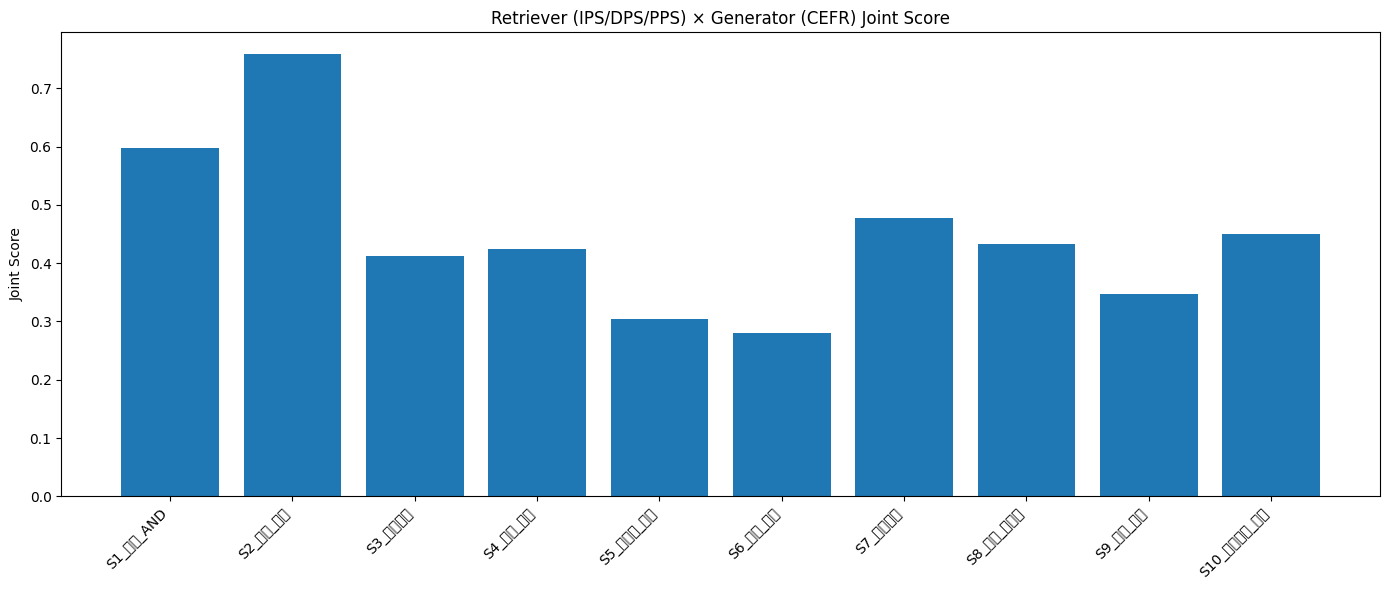

In [ ]:
# 시각화 ① 시나리오별 Joint Score 비교
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))

x = np.arange(len(df_final))

plt.bar(x, df_final["JOINT_SCORE"])
plt.xticks(x, df_final["scenario"], rotation=45, ha="right")
plt.ylabel("Joint Score")
plt.title("Retriever (IPS/DPS/PPS) × Generator (CEFR) Joint Score")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3509478088.py:12: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


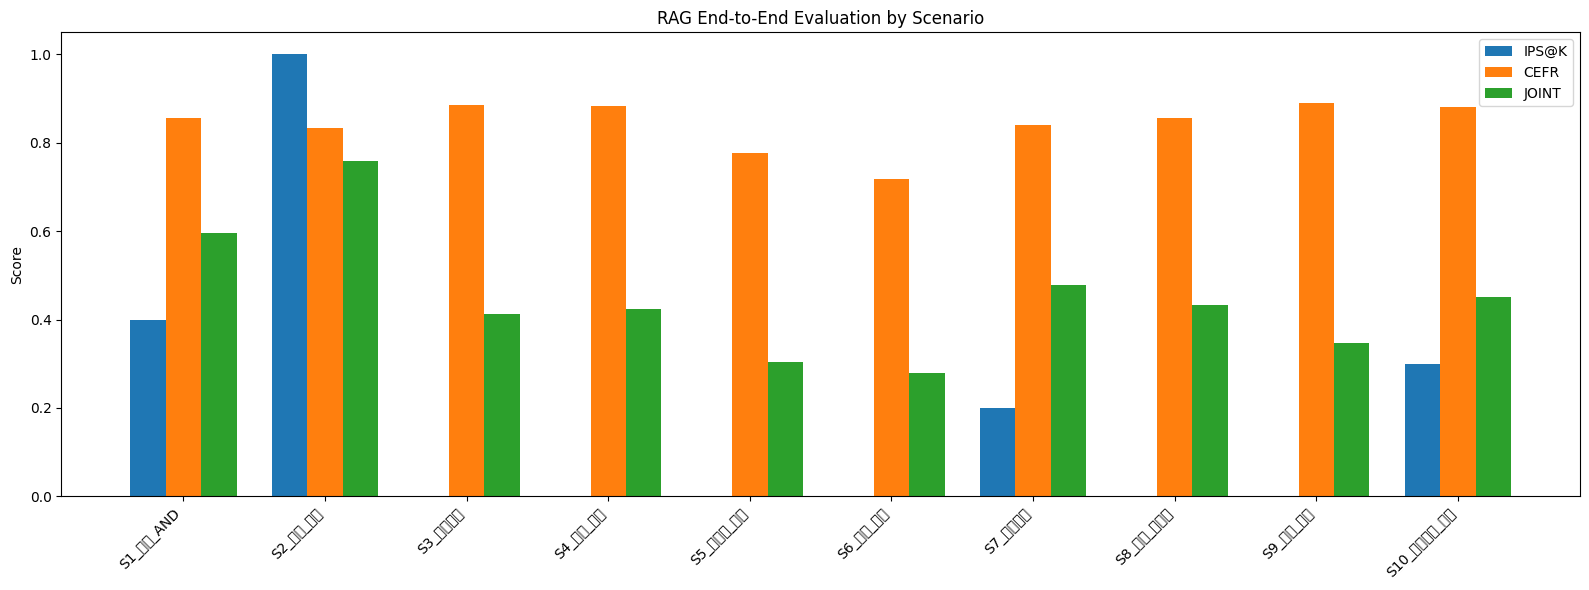

In [ ]:
# 시각화 ② Retriever vs Generator vs Joint
plt.figure(figsize=(16, 6))

plt.bar(x - 0.25, df_final["IPS@K"], width=0.25, label="IPS@K")
plt.bar(x, df_final["CEFR_score"], width=0.25, label="CEFR")
plt.bar(x + 0.25, df_final["JOINT_SCORE"], width=0.25, label="JOINT")

plt.xticks(x, df_final["scenario"], rotation=45, ha="right")
plt.ylabel("Score")
plt.title("RAG End-to-End Evaluation by Scenario")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1993688251.py:14: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


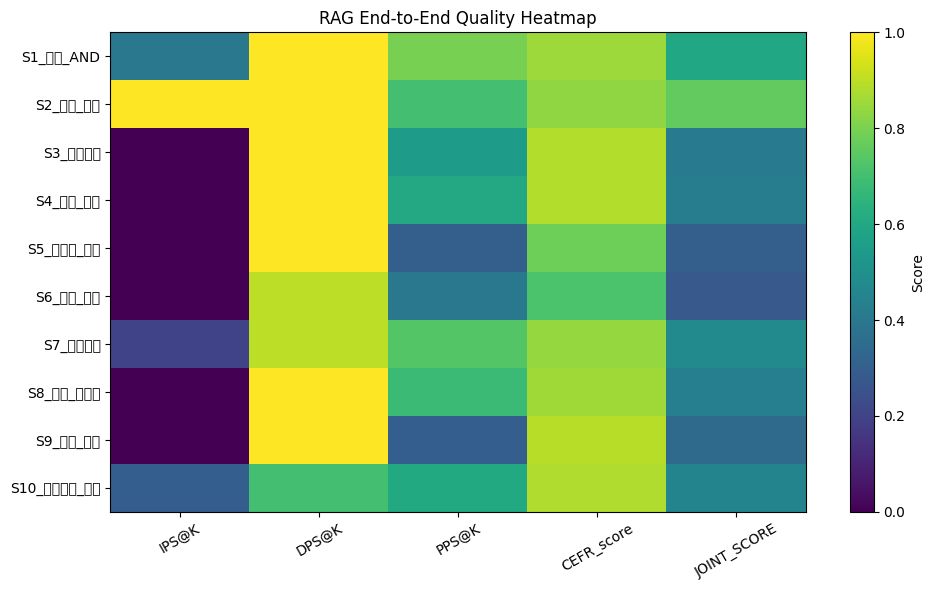

In [ ]:
# 시각화 ③ Heatmap
heatmap_df = df_final.set_index("scenario")[[
    "IPS@K", "DPS@K", "PPS@K", "CEFR_score", "JOINT_SCORE"
]]

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_df, aspect="auto")
plt.colorbar(label="Score")

plt.xticks(range(len(heatmap_df.columns)), heatmap_df.columns, rotation=30)
plt.yticks(range(len(heatmap_df.index)), heatmap_df.index)

plt.title("RAG End-to-End Quality Heatmap")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1756996072.py:15: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


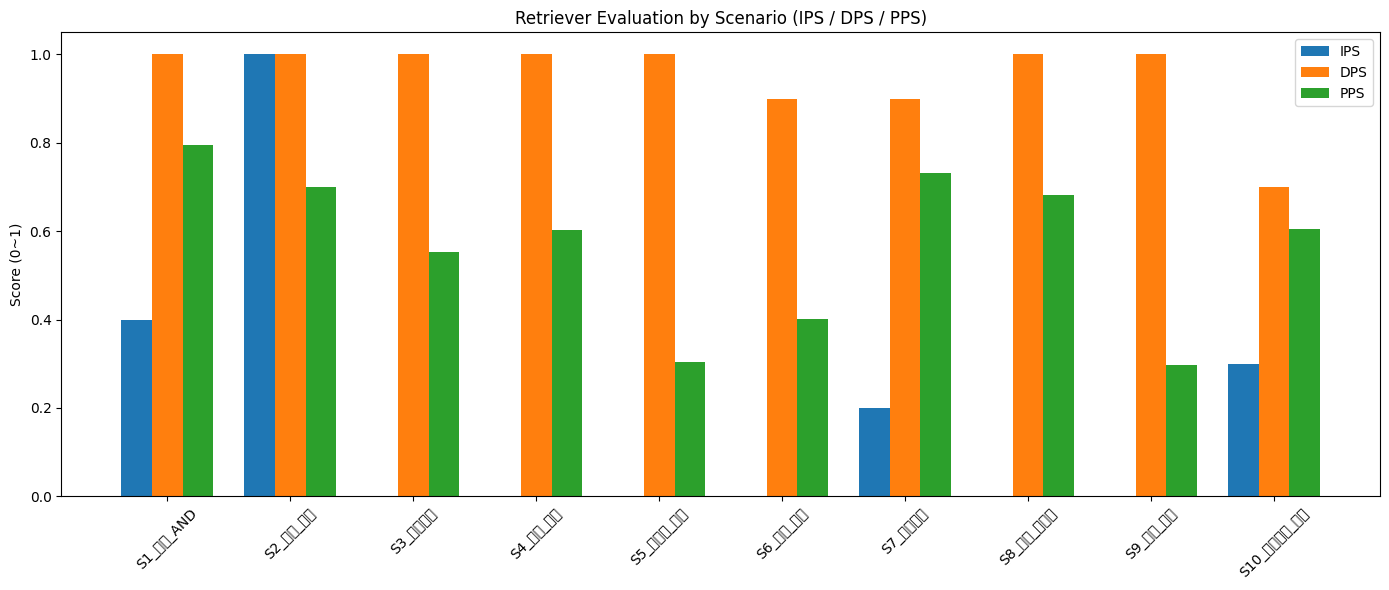

In [ ]:
# 결과 시각화 (시나리오별 성능 비교)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

x = range(len(df_eval))
plt.bar(x, df_eval["IPS@K"], width=0.25, label="IPS")
plt.bar([i + 0.25 for i in x], df_eval["DPS@K"], width=0.25, label="DPS")
plt.bar([i + 0.50 for i in x], df_eval["PPS@K"], width=0.25, label="PPS")

plt.xticks([i + 0.25 for i in x], df_eval["scenario"], rotation=45)
plt.ylabel("Score (0~1)")
plt.title("Retriever Evaluation by Scenario (IPS / DPS / PPS)")
plt.legend()
plt.tight_layout()
plt.show()

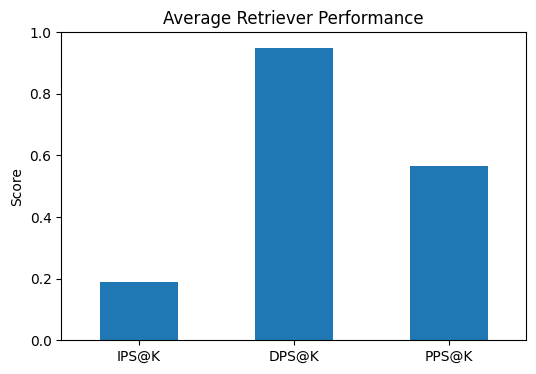

In [ ]:
# 지표 평균 요약
avg_scores = df_eval[["IPS@K", "DPS@K", "PPS@K"]].mean()

plt.figure(figsize=(6, 4))
avg_scores.plot(kind="bar")
plt.ylim(0, 1)
plt.title("Average Retriever Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# streamlit_chat.py
import os
import streamlit as st
from rag_pipeline import suggest_menus, recipe_stream, empathize_story

st.set_page_config(page_title="K-recipe", layout="wide")

# ---- API KEY 체크 (없으면 안내) ----
if not os.environ.get("OPENAI_API_KEY"):
    st.warning("OPENAI_API_KEY가 설정되지 않았어. .env 또는 환경변수 설정 확인해줘.")

# ---- CSS: 밝고 ‘앱 같은’ 톤 ----
st.markdown("""
<style>
.stApp{
  background:
    radial-gradient(1200px 700px at 10% 0%, rgba(255,217,185,0.55) 0%, rgba(255,217,185,0.0) 60%),
    radial-gradient(900px 600px at 90% 10%, rgba(190,230,255,0.55) 0%, rgba(190,230,255,0.0) 55%),
    linear-gradient(180deg, #ffffff 0%, #fff7ed 100%);
}
.block-container{max-width:1100px; padding-top:2.2rem;}

.hero{
  border-radius:24px;
  padding:22px 22px;
  background: rgba(255,255,255,0.75);
  border: 1px solid rgba(17,24,39,0.06);
  box-shadow: 0 18px 40px rgba(17,24,39,0.08);
  display:flex;
  align-items:center;
  gap:18px;
}
.hero h1{ margin:0; font-size:40px; letter-spacing:-1px; color:#111827; }
.hero p{ margin:6px 0 0 0; color:#6b7280; font-size:14px; }
.badge{
  display:inline-block;
  padding:6px 10px;
  border-radius:999px;
  background:#111827;
  color:white;
  font-size:12px;
  font-weight:700;
}
.hr{ height:1px; background: rgba(17,24,39,0.08); margin:18px 0; }

.card{
  background:#fff;
  border:1px solid rgba(17,24,39,0.08);
  border-radius:18px;
  box-shadow: 0 12px 30px rgba(17,24,39,0.08);
  padding:16px 16px 14px 16px;
  min-height:200px;
}
.card-title{font-size:20px;font-weight:900;color:#111827;line-height:1.2;}
.card-sub{margin-top:8px;color:#4b5563;font-size:14px;}
.tag{
  display:inline-block;padding:6px 10px;border-radius:999px;
  background:#f3f4f6;color:#374151;font-size:12px;
  margin-right:6px;border:1px solid rgba(17,24,39,0.06);
}
.meme{margin-top:10px;font-size:13px;color:#6b7280;}
.stButton>button{border-radius:999px !important; font-weight:800 !important;}
.stTextInput>div>div>input, .stTextArea textarea{ border-radius:14px !important; }
</style>
""", unsafe_allow_html=True)

# ---- state ----
if "stage" not in st.session_state:
    st.session_state.stage = "story"   # story -> ingredients -> style -> menus -> recipe
if "story" not in st.session_state:
    st.session_state.story = ""
if "empathy" not in st.session_state:
    st.session_state.empathy = ""
if "ingredients" not in st.session_state:
    st.session_state.ingredients = ""
if "style" not in st.session_state:
    st.session_state.style = "상관없음"
if "menus" not in st.session_state:
    st.session_state.menus = []
if "picked" not in st.session_state:
    st.session_state.picked = None

def reset_all():
    st.session_state.stage = "story"
    st.session_state.story = ""
    st.session_state.empathy = ""
    st.session_state.ingredients = ""
    st.session_state.style = "상관없음"
    st.session_state.menus = []
    st.session_state.picked = None
    st.rerun()

# ---- sidebar ----
with st.sidebar:
    st.header("K-recipe")
    st.caption("감정 + 냉장고 재료 기반 맞춤 한식 추천")
    if st.button("처음으로 돌아가기", use_container_width=True):
        reset_all()

# ---- hero ----
st.markdown("""
<div class="hero">
  <div style="flex:1;">
    <span class="badge"> Team : 응답하RAG </span>
    <h1>K-recipe</h1>
    <p>오늘의 감정 + 냉장고 상황에 맞는 한국요리 추천</p>
  </div>
  <div style="width:220px; text-align:right; opacity:0.9;">
    <img src="https://images.unsplash.com/photo-1555939594-58d7cb561ad1?auto=format&fit=crop&w=520&q=60"
         style="width:210px;height:120px;border-radius:18px;object-fit:cover;border:1px solid rgba(17,24,39,0.08);" />
  </div>
</div>
<div class="hr"></div>
""", unsafe_allow_html=True)

# ---- stage: story ----
if st.session_state.stage == "story":
    st.subheader("오늘은 어땠어?")
    st.caption("메뉴 추천하려면 네 상황부터 듣고 싶어. 짧게 한 줄이면 충분.")

    story = st.text_input(
        "한 줄로 말해줘",
        value=st.session_state.story,
        placeholder="예) 오늘 멘탈 박살… 위로되는 거 먹고 싶다."
    )

    col1, col2 = st.columns([1, 3])
    with col1:
        if st.button("다음", use_container_width=True):
            if not story.strip():
                st.error("한 줄만이라도 적어줘. 그게 추천의 재료야.")
            else:
                st.session_state.story = story.strip()
                with st.spinner("사연 접수 중..."):
                    st.session_state.empathy = empathize_story(st.session_state.story)
                st.session_state.stage = "ingredients"
                st.rerun()

    with col2:
        if story.strip():
            st.info("좋아. 이제 ‘다음’ 누르면 내가 사연 접수하고 냉장고 상황으로 넘어갈게.")
        else:
            st.caption("")

# ---- stage: ingredients ----
elif st.session_state.stage == "ingredients":
    if st.session_state.empathy:
        st.info(st.session_state.empathy)

    st.subheader("냉장고에 뭐 있어?")
    st.caption("쉼표로 적어줘. 없어도 괜찮아(없으면 ‘없음’이라고 써도 됨).")

    ing = st.text_input(
        "보유 재료",
        value=st.session_state.ingredients,
        placeholder="예) 김치, 돼지고기, 대파, 두부"
    )

    col1, col2 = st.columns([1,1])
    with col1:
        if st.button("이전", use_container_width=True):
            st.session_state.stage = "story"
            st.rerun()
    with col2:
        if st.button("다음", use_container_width=True):
            st.session_state.ingredients = (ing.strip() if ing.strip() else "없음")
            st.session_state.stage = "style"
            st.rerun()

# ---- stage: style ----
elif st.session_state.stage == "style":
    if st.session_state.empathy:
        st.info(st.session_state.empathy)

    st.subheader("원하는 스타일은?")
    st.caption("취향 한 번만 찍어줘. 그 다음에 메뉴 후보 카드 보여줄게.")

    options = ["상관없음", "초간단", "칼칼/매콤", "든든한 한 끼", "다이어트 느낌", "혼술 안주"]
    style = st.selectbox(
        "스타일",
        options,
        index=options.index(st.session_state.style) if st.session_state.style in options else 0
    )

    col1, col2 = st.columns([1,1])
    with col1:
        if st.button("이전", use_container_width=True):
            st.session_state.stage = "ingredients"
            st.rerun()
    with col2:
        if st.button("메뉴 후보 보기", use_container_width=True):
            st.session_state.style = style
            with st.spinner("메뉴 후보 만드는 중..."):
                st.session_state.menus = suggest_menus(
                    st.session_state.story,
                    st.session_state.ingredients,
                    st.session_state.style
                )
            st.session_state.stage = "menus"
            st.rerun()

# ---- stage: menus ----
elif st.session_state.stage == "menus":
    if st.session_state.empathy:
        st.info(st.session_state.empathy)

    st.subheader("이 상황엔… 이 메뉴들이 딱이야")
    st.caption("하나 고르면 레시피는 핵심만 딱 보여줄게.")

    menus = st.session_state.menus or []
    if not menus:
        st.warning("후보를 못 뽑았어. 다시 시도해볼까?")
        if st.button("다시 뽑기", use_container_width=True):
            st.session_state.stage = "style"
            st.rerun()
        st.stop()

    cols = st.columns(2, gap="large")
    for i, m in enumerate(menus):
        c = cols[i % 2]
        with c:
            st.markdown(f"""
            <div class="card">
              <div>
                <div class="card-title">{m.get("title","")}</div>
                <div class="card-sub">{m.get("subtitle","")}</div>
                <div style="margin-top:10px;">
                  {''.join([f'<span class="tag">{t}</span>' for t in (m.get("tags") or [])[:3]])}
                </div>
                <div class="meme">{m.get("meme","")}</div>
              </div>
            </div>
            """, unsafe_allow_html=True)

            spice = max(1, min(5, int(m.get("spice", 3))))
            spice_bar = "🌶️" * spice
            if st.button(f"{spice_bar}  이 메뉴로 간다", key=f"pick_{i}", use_container_width=True):
                st.session_state.picked = m.get("raw_title") or m.get("title")
                st.session_state.stage = "recipe"
                st.rerun()

    st.markdown('<div class="hr"></div>', unsafe_allow_html=True)
    col1, col2 = st.columns([1,1])
    with col1:
        if st.button("다른 후보 다시 뽑기", use_container_width=True):
            with st.spinner("다시 추천 중..."):
                st.session_state.menus = suggest_menus(
                    st.session_state.story,
                    st.session_state.ingredients,
                    st.session_state.style
                )
            st.rerun()
    with col2:
        if st.button("처음으로 돌아가기", use_container_width=True):
            reset_all()

# ---- stage: recipe ----
elif st.session_state.stage == "recipe":
    picked = st.session_state.picked
    if not picked:
        st.session_state.stage = "menus"
        st.rerun()

    if st.session_state.empathy:
        st.info(st.session_state.empathy)

    st.subheader(f"선택 메뉴: {picked}")
    st.caption("레시피는 핵심만 보여줄게.")

    col1, col2 = st.columns([1,1])
    with col1:
        if st.button("메뉴 다시 고르기", use_container_width=True):
            st.session_state.stage = "menus"
            st.rerun()
    with col2:
        if st.button("처음으로 돌아가기", use_container_width=True):
            reset_all()

    st.markdown('<div class="hr"></div>', unsafe_allow_html=True)

    with st.chat_message("assistant"):
        st.write_stream(
            recipe_stream(
                st.session_state.story,
                st.session_state.ingredients,
                picked
            )
        )